<a href="https://colab.research.google.com/github/IshitaSwami/Day_15_QuantumChallenge/blob/main/Day_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 100.5 MB/s eta 0:00:00


In [3]:
import pennylane as qml
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import dft

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


In [4]:
n = 2

print("DFT matrix for n = 2:\n")
print(np.round(1 / np.sqrt(2 ** n) * dft(2 ** n), 2))

qft_inverse = qml.adjoint(qml.QFT([0,1]))

print("\n inverse QFT matrix for n = 2:\n")
print(np.round(qft_inverse.matrix(), 2))


DFT matrix for n = 2:

[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0.5+0.j   0. -0.5j -0.5-0.j  -0. +0.5j]
 [ 0.5+0.j  -0.5-0.j   0.5+0.j  -0.5-0.j ]
 [ 0.5+0.j  -0. +0.5j -0.5-0.j   0. -0.5j]]

 inverse QFT matrix for n = 2:

[[ 0.5-0.j   0.5-0.j   0.5-0.j   0.5-0.j ]
 [ 0.5-0.j   0. -0.5j -0.5-0.j   0. +0.5j]
 [ 0.5-0.j  -0.5-0.j   0.5-0.j  -0.5-0.j ]
 [ 0.5-0.j   0. +0.5j -0.5-0.j   0. -0.5j]]


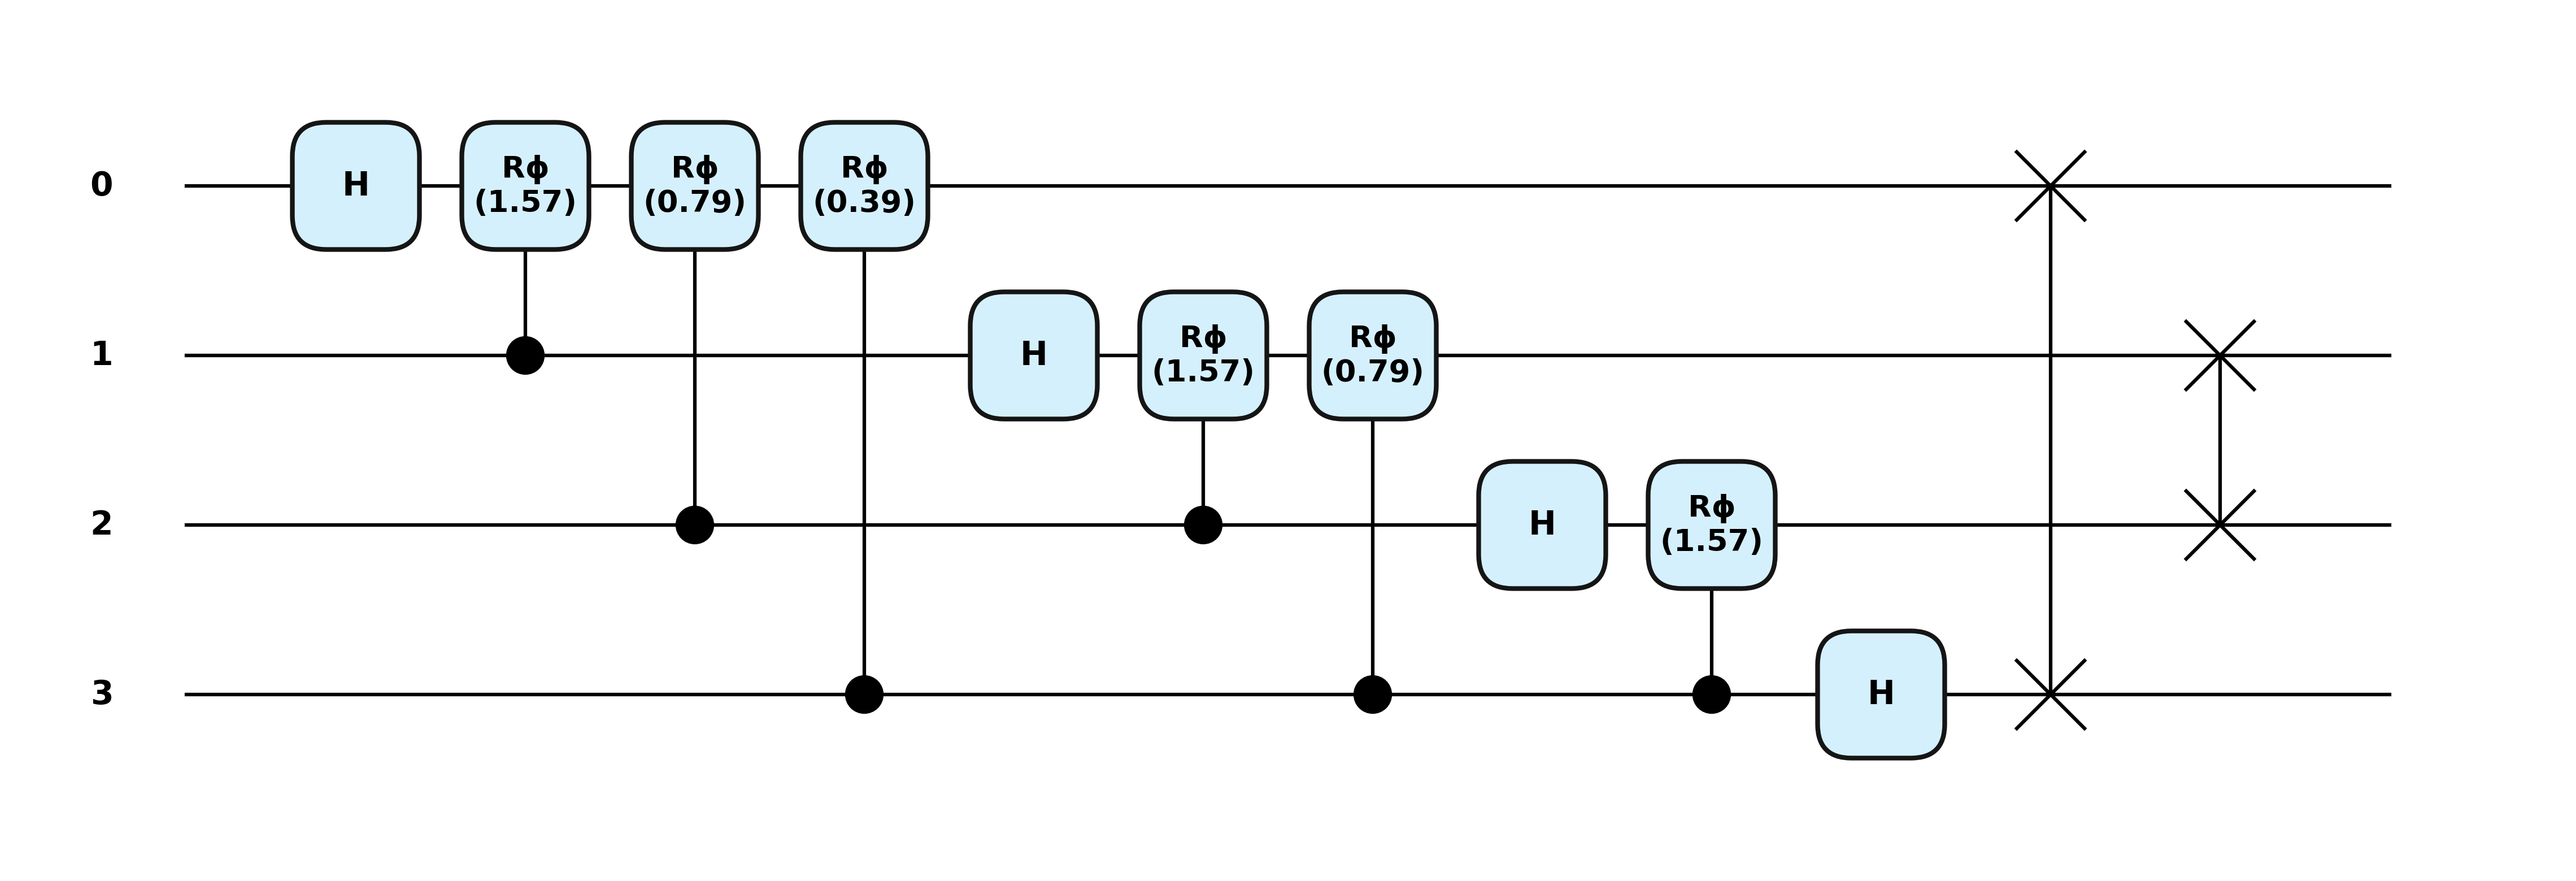

In [5]:
plt.style.use('pennylane.drawer.plot')

@partial(qml.transforms.decompose, max_expansion=1)

def circuit():
  qml.QFT(wires=range(4))

qml.draw_mpl(circuit, decimals = 2, style = 'pennylane')()
plt.show()

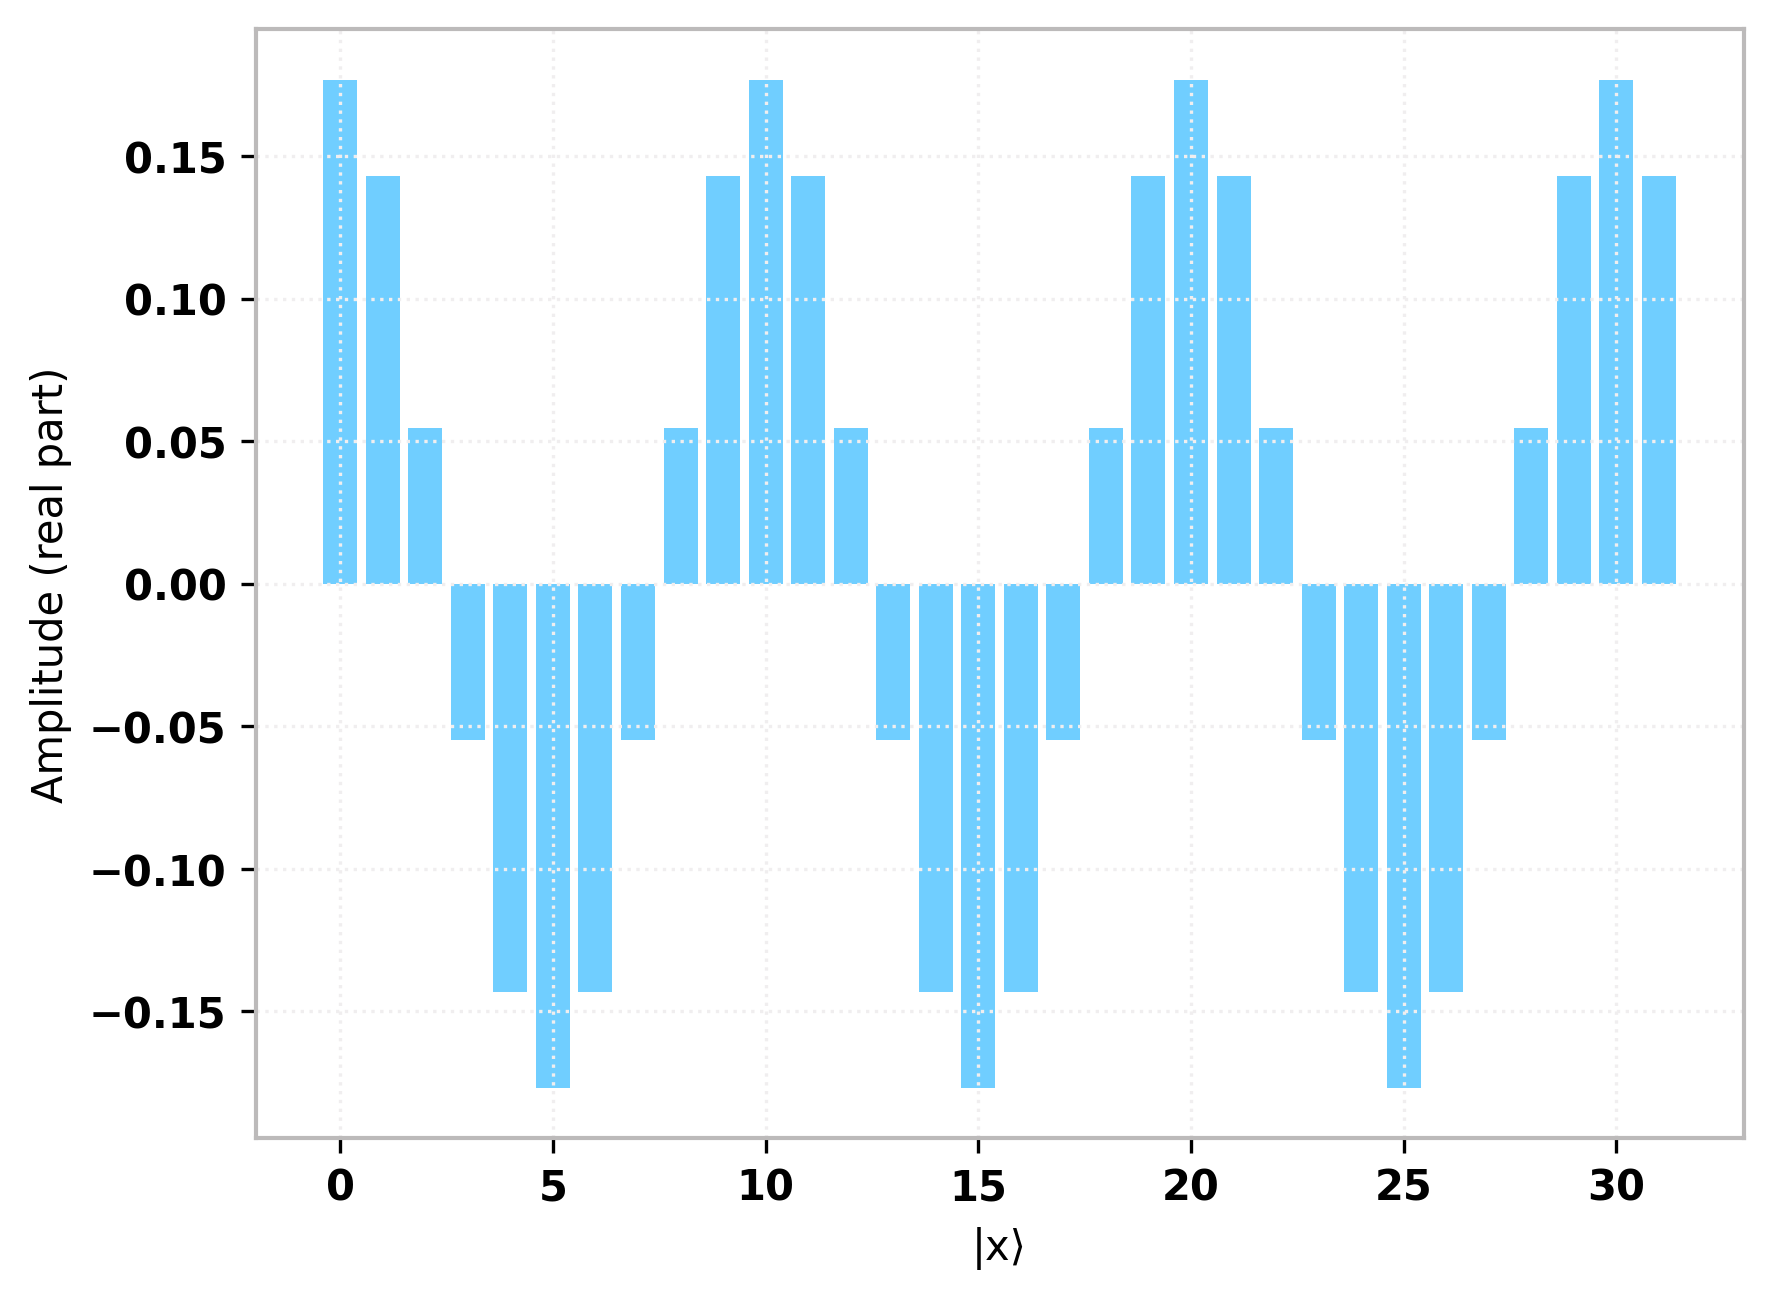

In [6]:
def prep():
    """quntum function that prepares the state."""
    qml.PauliX(wires=0)
    for wire in range(1, 6):
        qml.Hadamard(wires=wire)
    qml.ControlledSequence(qml.PhaseShift(-2 * np.pi / 10, wires=0), control=range(1, 6))
    qml.PauliX(wires=0)

dev = qml.device("default.qubit")
@qml.qnode(dev)
def circuit():
    prep()
    return qml.state()

state = circuit().real[:32]

plt.bar(range(len(state)), state)
plt.xlabel("|x⟩")
plt.ylabel("Amplitude (real part)")
plt.show()


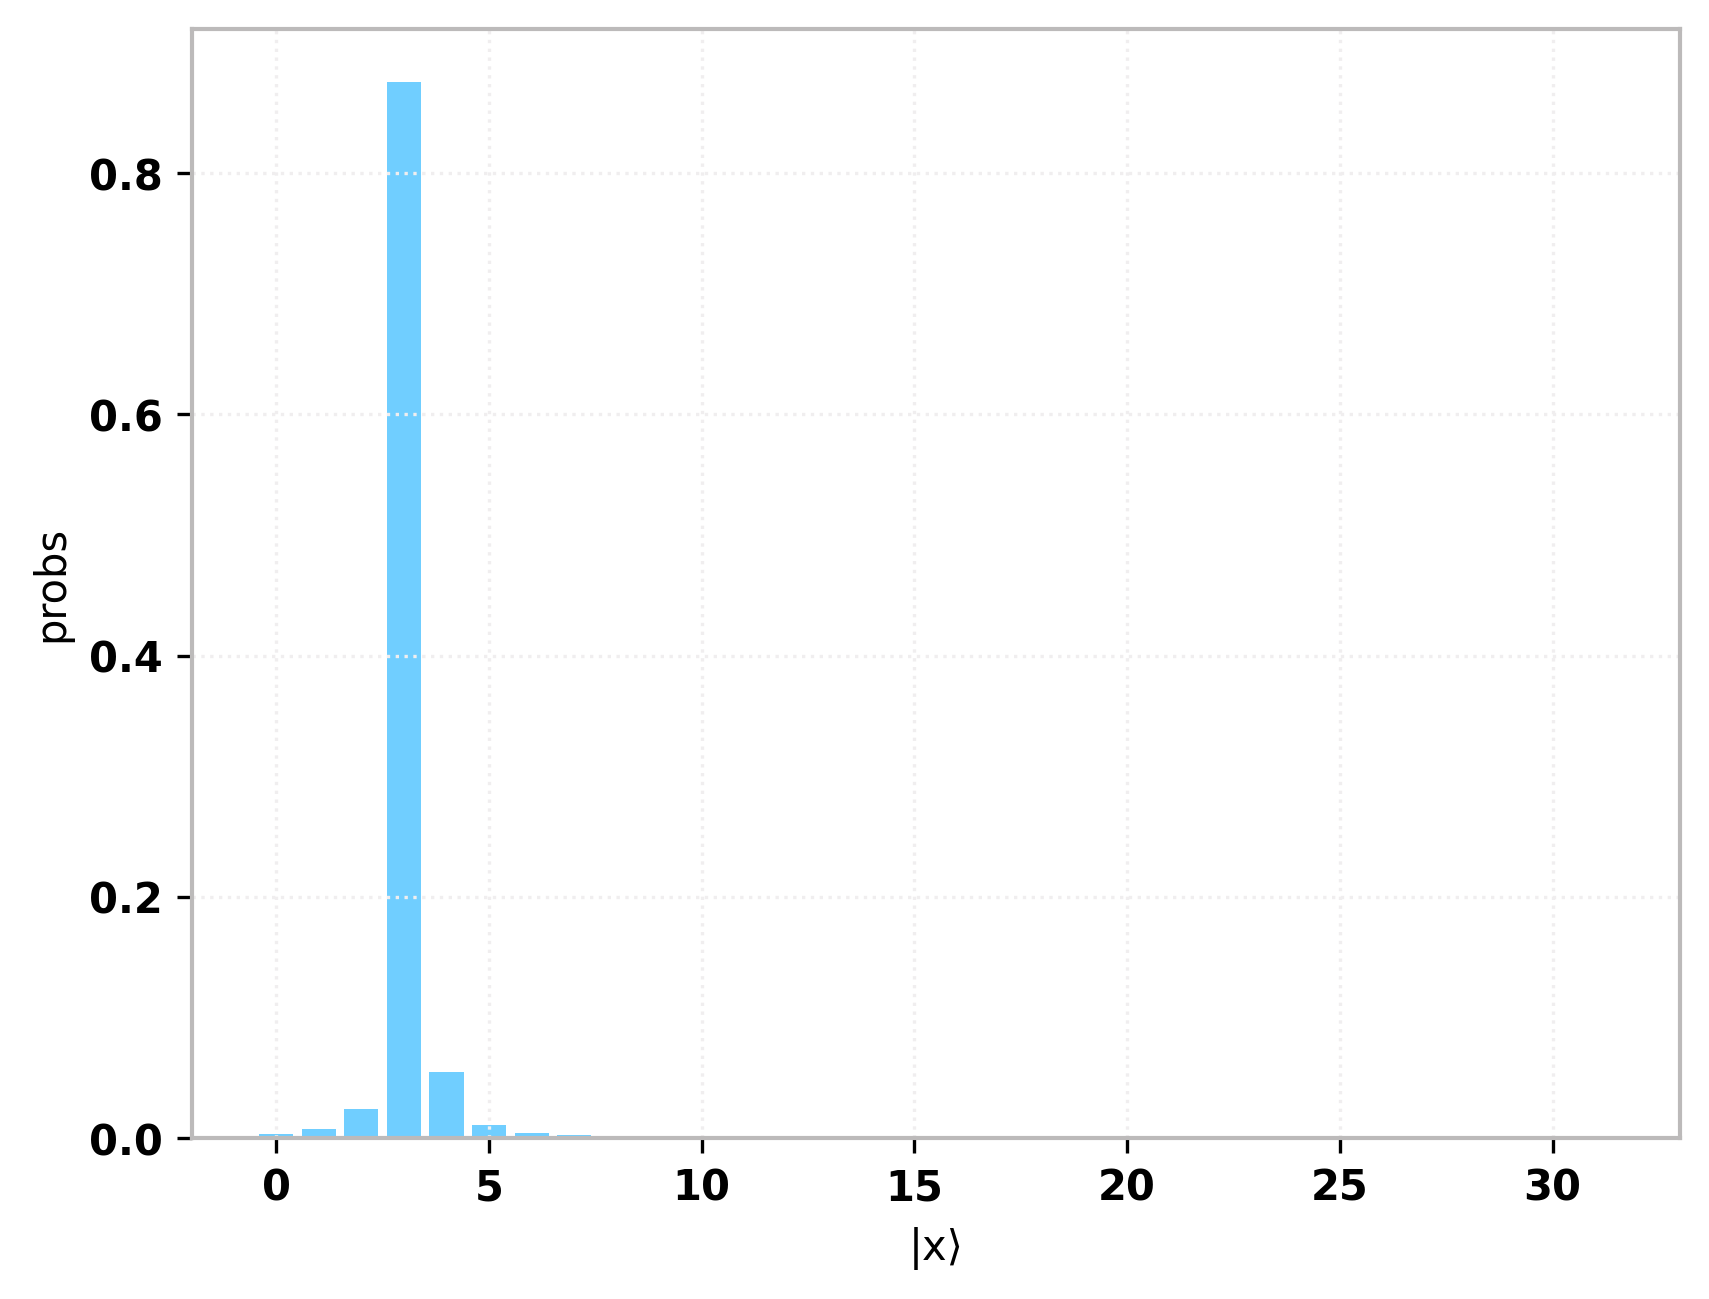

In [7]:
@qml.qnode(dev)
def circuit():
  prep()
  qml.QFT(wires=range(1, 6))

  return qml.probs(wires=range(1, 6))

state = circuit()[:32]

plt.bar(range(len(state)), state)
plt.xlabel("|x⟩")
plt.ylabel("probs")
plt.show()

In [8]:
def U(wires):
    return qml.PhaseShift(2 * np.pi / 5, wires=wires)

In [9]:
dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # initialize to state |1>
    qml.PauliX(wires=0)

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(U(wires=0), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)

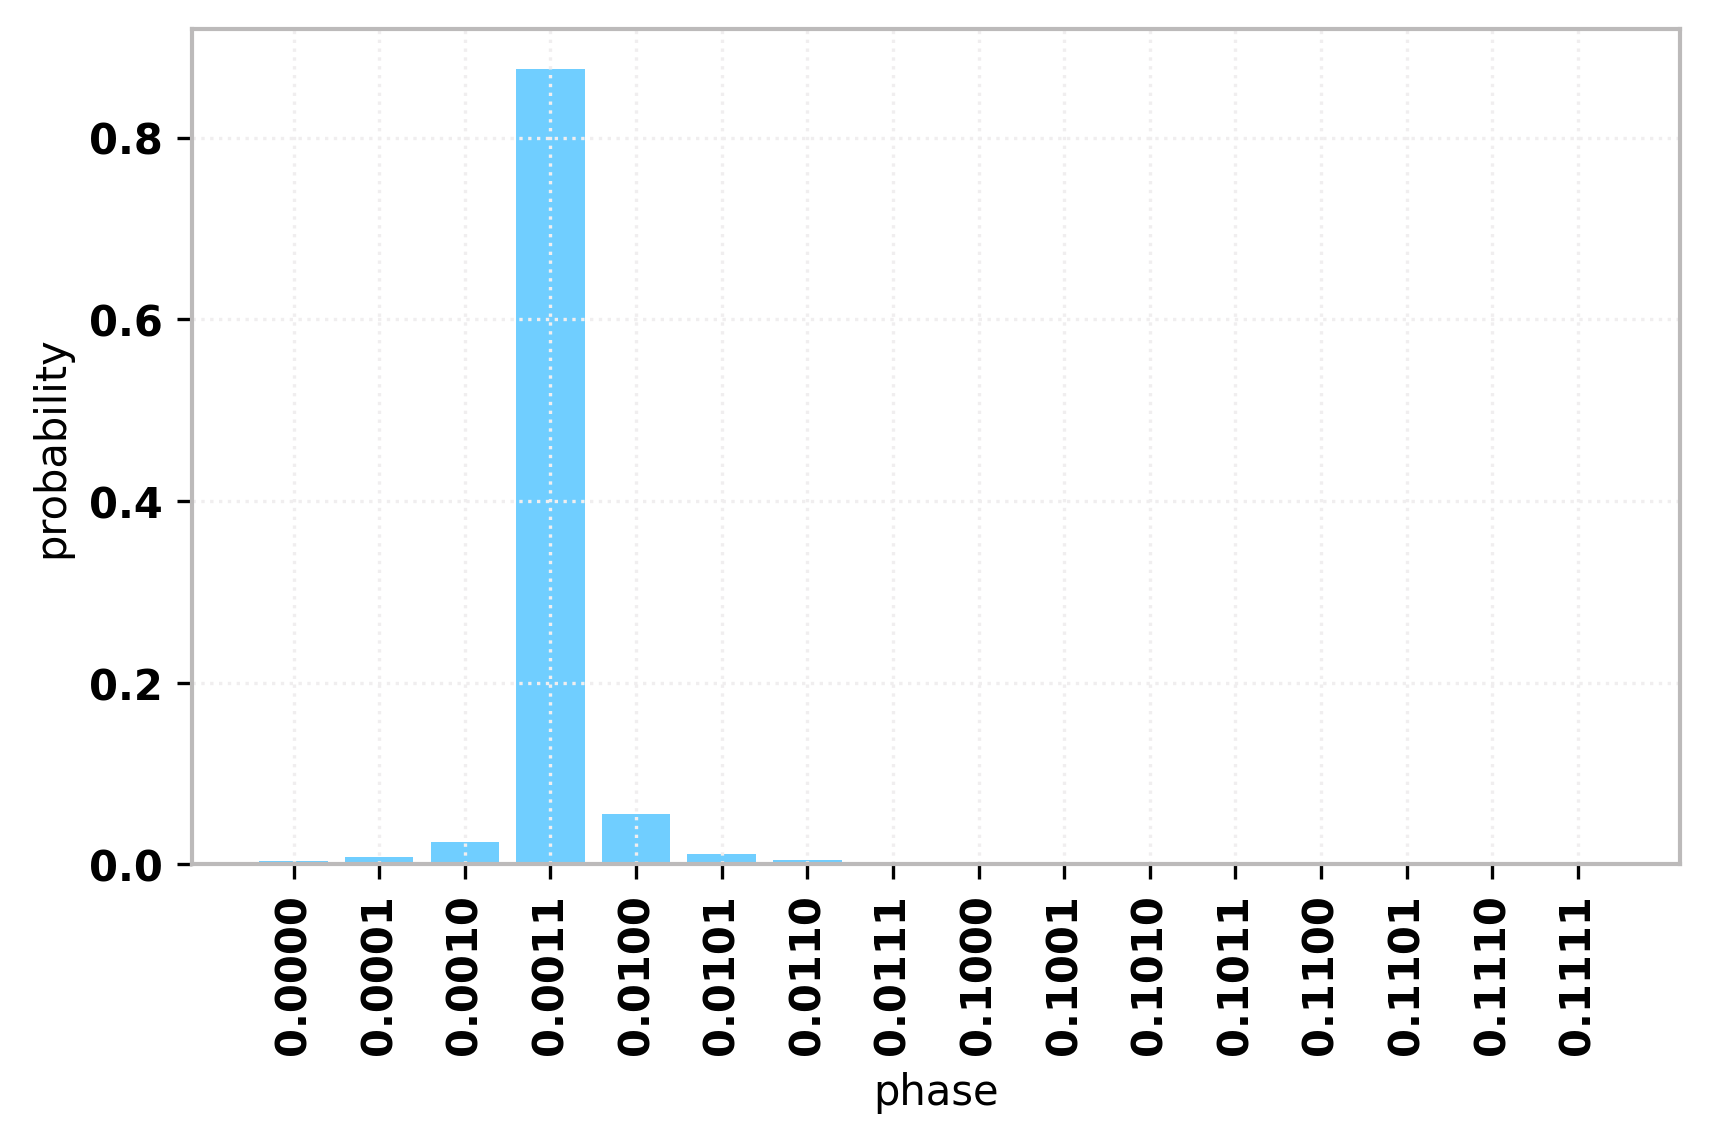

In [10]:
import matplotlib.pyplot as plt

estimation_wires = range(1, 5)

results = circuit_qpe(estimation_wires)

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

